## Original code modified from a project by DK

In [1]:
import ABCD_ML
import pandas as pd
import os

import matplotlib.pyplot as plt
from nilearn.plotting import plot_glass_brain, plot_stat_map

# We will use some extra loading functions
from Neuro_Plotting.Ref import SurfRef, VolRef, load_mapping, save_mapping
from Neuro_Plotting.Plot import Plot_Surf, Plot_Surf_Collage, Plot_SurfVol_Collage

In [2]:
# Base data directories, 2.0 release with most of the phenotype information
main_dr = '/home/sage/work/'

nda_dr = main_dr + 'ABCD2p0NDA/'

# This folder contains the re-released 2.0.1 fixed MRI derived measurements
nda_dr2 = main_dr + 'ABCDFixRelease2p0p1'

#This file stores the name mapping
map_file = os.path.join(nda_dr2, 'Fix Release Notes 2.0.1_Public', '24. ABCD_Release_2.0.1_Updates',
                        'abcd_2.0.1_mapping.csv')

# Destr atlas structural MRI rois
data1 = os.path.join(nda_dr2, 'mrisst02.txt')
data2 = os.path.join(nda_dr2,'abcd_tfsstabwdp101.txt')
data3 = os.path.join(nda_dr2, 'abcd_tfsstabwdp201.txt')

# Family ID
strat1 = os.path.join(nda_dr, 'acspsw03.txt')

# This file contains the NIH toolbox scores
target_loc = nda_dr + 'abcd_sst02.txt'

In [3]:
ML = ABCD_ML.ABCD_ML(exp_name = 'SSRT',
                     log_dr = None,
                     existing_log = 'append',
                     notebook = True,
                     use_default_subject_ids = False,
                     low_memory_mode = False,
                     random_state = 1,
                     verbose = True
                     )

exp_name = SSRT
log_dr = None
existing_log = append
verbose = True
exp log dr setup at: None
log file at: None
notebook = True
use_default_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 1
ABCD_ML object initialized


In [4]:
# Exclude subjects w/ data from philips scanners
ML.Load_Exclusions('philips.txt')

ML.Load_Name_Map(loc = map_file,
                 dataset_type= 'explorer',
                 source_name_col= 'nda_name',
                 target_name_col= 'deap_name')

Total excluded subjects:  1513
Removed excluded subjects from loaded dfs
Setting default load params, as they have not been set!

Default load params set within self.default_load_params.
----------------------
dataset_type: basic
subject_id: src_subject_id
eventname: None
eventname_col: eventname
overlap_subjects: False
na_values: ['777', '999']
drop_na: True
drop_or_na: drop

To change the default load params, call self.Set_Default_Load_Params()

Loading /home/sage/work/ABCDFixRelease2p0p1/Fix Release Notes 2.0.1_Public/24. ABCD_Release_2.0.1_Updates/abcd_2.0.1_mapping.csv  with dataset type: explorer
Loading new name_map from file!


In [5]:
# These drop keys are to narrow in on only the subcortical volumes of interest
drop_keys = ['_csf', '.white.matter', '.vent', '_cort.desikan_', 'all_beta']

# These are to specify the contrasts we want to load
contrast_keys = ['tfmri_sst_all_correct.go.vs.fixation_beta_', 
                 'tfmri_sst_all_correct.stop.vs.correct.go_beta_',
                 'tfmri_sst_all_incorrect.stop.vs.correct.go_beta_']

ML.Load_Data(loc = [data1,data2,data3],
             inclusion_keys = contrast_keys,
             drop_keys=drop_keys,
             clear_existing=True,
             subject_id='src_subject_id',
             dataset_type = 'basic',
             filter_outlier_std = 10)

Cleared loaded data.

Loading /home/sage/work/ABCDFixRelease2p0p1/mrisst02.txt  with dataset type: basic
dropped ['collection_id', 'mrisst02_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'tfmri_sa_beta_visitid', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /home/sage/work/ABCDFixRelease2p0p1/abcd_tfsstabwdp101.txt  with dataset type: basic
dropped ['collection_id', 'abcd_tfsstabwdp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /home/sage/work/ABCDFixRelease2p0p1/abcd_tfsstabwdp201.txt  with dataset type: basic
dropped ['collection_id', 'abcd_tfsstabwdp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Dropped 578 columns per passed drop_keys argument
Keeping 495 columns per passed incl

Plotting data distribution.
Set to overlapping loaded subjects.
Viewing data with shape: (7472, 495)

Loaded data top columns by skew:
tfmri_sst_all_correct.go.vs.fixation_beta_cort.destrieux_s.orbital.h.shaped.lh      -2.738835
tfmri_sst_all_correct.go.vs.fixation_beta_cort.destrieux_s.orbital.h.shaped.rh      -1.824379
tfmri_sst_all_correct.go.vs.fixation_beta_cort.destrieux_g.front.inf.orbital.rh     -1.707467
tfmri_sst_all_correct.go.vs.fixation_beta_subcort.aseg_cerebellum.cortex.rh         -1.654280
tfmri_sst_all_correct.go.vs.fixation_beta_cort.destrieux_g.rectus.rh                -1.620326
                                                                                       ...   
tfmri_sst_all_correct.stop.vs.correct.go_beta_cort.destrieux_s.suborbital.rh         0.896825
tfmri_sst_all_correct.go.vs.fixation_beta_cort.destrieux_g.temp.sup.plan.polar.lh    0.902461
tfmri_sst_all_correct.go.vs.fixation_beta_cort.destrieux_g.front.middle.lh           0.944647
tfmri_sst_all_corre

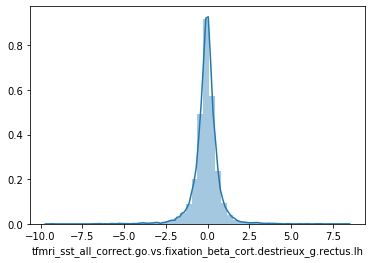

In [6]:
ML.Show_Data_Dist()

Make sure you include essentially the longest unique key in the name you want, e.g., if you just want correct go, by passing "correct.go." you will also pick up "incorrect.go." so instead 'tfmri_sst_all_correct.go.vs.fixation_beta_' is very conservative, and will get you just correct go.

cleared targets.

Loading /home/sage/work/ABCD2p0NDA/abcd_sst02.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: tfmri_sst_all_beh_total_mean.rt
Filtering for outliers, dropping rows with params:  (0.015, 0.99)
Min-Max Score (before outlier filtering): -692.0 702.69230769
Min-Max Score (post outlier filtering): 84.33866667 500.77867746

Dropped 210 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...
Final shape:  (8156, 1)

Total valid overlapping subjects = 7281

All loaded targets
0 : tfmri_sst_all_beh_total_mean.rt

Set to overlapping loaded subjects.
-- tfmri_sst_all_beh_total_mean.rt --


,tfmri_sst_all_beh_total_mean.rt
count,7281.000000
mean,303.026513
std,67.097403
min,84.338667
25%,259.278940
50%,301.126984
75%,345.684015
max,500.778677


Num. of unique vals: 7276



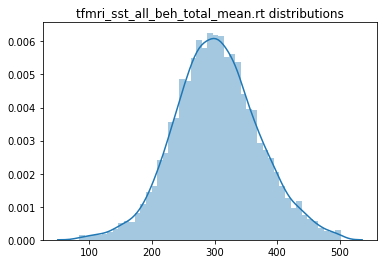

In [7]:
ML.Load_Targets(target_loc,
                dataset_type='basic',
                col_name='tfmri_sst_all_beh_total_meanrt',
                data_type='float',
                filter_outlier_percent=(.015, .99),
                clear_existing=True)

ML.Show_Targets_Dist()

In [8]:
ML.Load_Covars(loc = data1,
               col_name = 'sex',
               data_type = 'b')

Loading /home/sage/work/ABCDFixRelease2p0p1/mrisst02.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 1 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
loading: sex
loaded shape:  (7734, 1)

Total valid overlapping subjects = 7280



In [9]:
ML.Train_Test_Split(test_size=0.2,
                    random_state=1001)

Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (7280, 497)
Performing split on 7280 subjects!
random_state: 1001
Test split size: 0.2

Performed train test split
Train size: 5824
Test size:  1456


## On to modelling

In [10]:
ML.Set_Default_ML_Params(problem_type = 'regression',
                         metric = 'r2',
                         scaler = ['winsorize', 'standard'],
                         scaler_scope = ['float', 'float'],
                         splits = 5,
                         n_repeats = 2,
                         search_type = 'RandomSearch',
                         search_splits = 2,
                         n_jobs = 12,
                         search_n_iter = 100,
                         random_state = 1001,
                         model_params = 1,
                         compute_train_score = True)

# Setting fold sizes = to True!
ML.Set_Default_ML_Verbosity(fold_sizes = True)

Default ML params set within self.default_ML_params.
----------------------
problem_type: regression
target: 0
model: linear
metric: r2
loader: None
loader_scope: data files
imputer: ['mean', 'median']
imputer_scope: ['float', 'cat']
scaler: ['winsorize', 'standard']
scaler_scope: ['float', 'float']
transformer: None
transformer_scope: float
sampler: None
sample_on: targets
feat_selector: None
splits: 5
n_repeats: 2
weight_metric: False
search_splits: 2
ensemble: basic ensemble
ensemble_split: 0.2
search_type: RandomSearch
model_params: 1
loader_params: 0
imputer_params: 0
scaler_params: 0
transformer_params: 0
sampler_params: 0
feat_selector_params: 0
ensemble_params: 0
n_jobs: 12
search_n_iter: 100
scope: all
subjects: all
compute_train_score: True
random_state: 1001
feat_importances: base
feat_importances_params: 0
cache: None
extra_params: {}

Default ML verbosity set within self.default_ML_verbosity.
----------------------
save_results: False
progress_bar: True
show_init_params: T

In [11]:
results = ML.Evaluate(model = 'elastic net',
                      model_params = 1,
                      search_type = 'TwoPointsDE',
                      search_n_iter = 60)

Running Evaluate with:
target = 0
problem_type = regression
model = elastic net
model_params = 1
metric = r2
weight_metric = False
scaler = ['winsorize', 'standard']
scaler_scope = ['float', 'float']
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 5
n_repeats = 2
search_type = TwoPointsDE
search_splits = 2
search_n_iter = 60
n_jobs = 12
scope = all
subjects = all
compute_train_score = True
random_state = 1001
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: elastic net

Using: 496 feats


Train subjects: 4659
Val/Test subjects: 1165
Train subjects: 4659
Val/Test subjects: 1165
Train subjects: 4659
Val/Test subjects: 1165
Train subjects: 4659
Val/Test subjects: 1165
Train subjects: 4660
Val/Test subjects: 1164
Train subjects: 4659
Val/Test subjects: 1165
Train subjects: 4659
Val/Test subjects: 1165
Train subjects: 4659
Val/Test subjects: 1165
Train subjects: 4659
Val/Test subjects: 1165
Train subjects: 4660
Val/Test subjects: 1164



Training Scores
_______________
Metric:  r2
Mean Training score:  0.1738963183339012
Macro Std in Training score:  0.0017886465351513448
Micro Std in Training score:  0.01602654560296209

Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.10634097919646956
Macro Std in Validation score:  0.001445968475215012
Micro Std in Validation score:  0.011404442867751828



In this example we will just assume this is fine, and move forward with testing

In [12]:
result = ML.Test(model = 'elastic net',
                 model_params = 1,
                 search_type = 'TwoPointsDE',
                 search_n_iter = 60)

Running Test with:
target = 0
problem_type = regression
model = elastic net
model_params = 1
metric = r2
weight_metric = False
scaler = ['winsorize', 'standard']
scaler_scope = ['float', 'float']
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
search_type = TwoPointsDE
search_splits = 2
search_n_iter = 60
n_jobs = 12
scope = all
subjects = all
compute_train_score = True
random_state = 1001
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: elastic net

Using: 496 feats
Train subjects: 5824
Val/Test subjects: 1456

Training Scores
_______________
Metric:  r2
Training Score:  0.1736361262732572

Testing Scores
______________
Metric:  r2
Testing Score:  0.13186427837534553



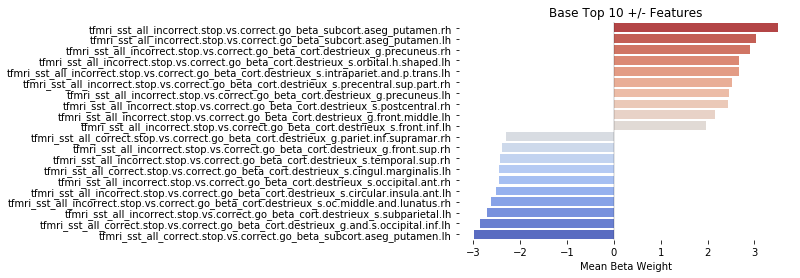

In [13]:
ML.Plot_Global_Feat_Importances(result['FIs'][0], top_n=10)

### Neuro_plotting

This next portion of the notebook will use an external library developed for plotting. You can download it at https://github.com/sahahn/Neuro_Plotting

In [14]:
# The directory where you install Neuro_Plotting
data_dr = '/home/sage/Neuro_Plotting/data/'

In [15]:
feats_df = result['FIs'][0].global_df.transpose()
feats_df = feats_df.reset_index()

In [16]:
feats_df

,index,0
0,tfmri_sst_all_correct.go.vs.fixation_beta_subc...,-0.629291
1,tfmri_sst_all_correct.go.vs.fixation_beta_subc...,-0.694787
2,tfmri_sst_all_correct.go.vs.fixation_beta_subc...,0.182568
3,tfmri_sst_all_correct.go.vs.fixation_beta_subc...,0.534579
4,tfmri_sst_all_correct.go.vs.fixation_beta_subc...,1.055007
...,...,...
491,tfmri_sst_all_incorrect.stop.vs.correct.go_bet...,-0.503595
492,tfmri_sst_all_incorrect.stop.vs.correct.go_bet...,-0.467681
493,tfmri_sst_all_incorrect.stop.vs.correct.go_bet...,-2.422715
494,tfmri_sst_all_incorrect.stop.vs.correct.go_bet...,0.000000


In [17]:
surf_ref = SurfRef(data_dr, space='fsaverage5', parc='destr')

In [18]:
betas = []
for c_key in contrast_keys:
    betas.append(surf_ref.get_hemis_plot_vals(feats_df, '.lh', '.rh', i_keys=['.destrieux', c_key]))

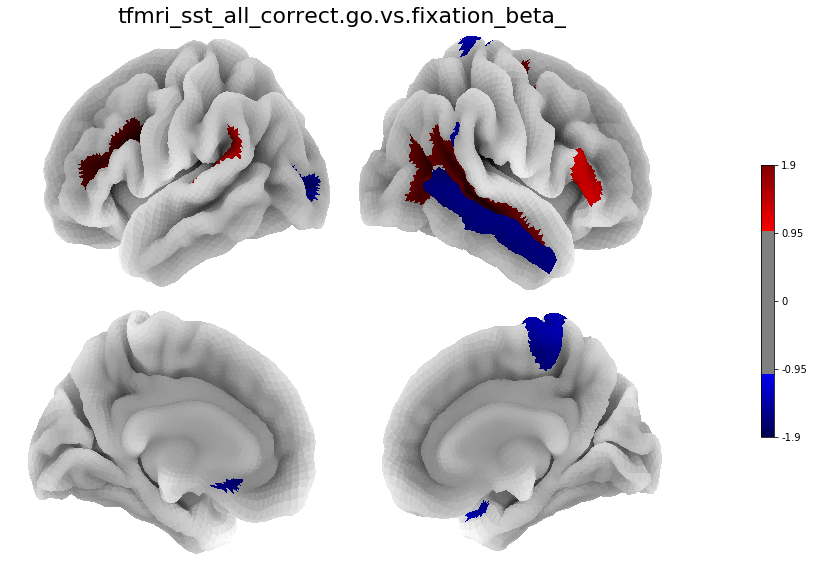

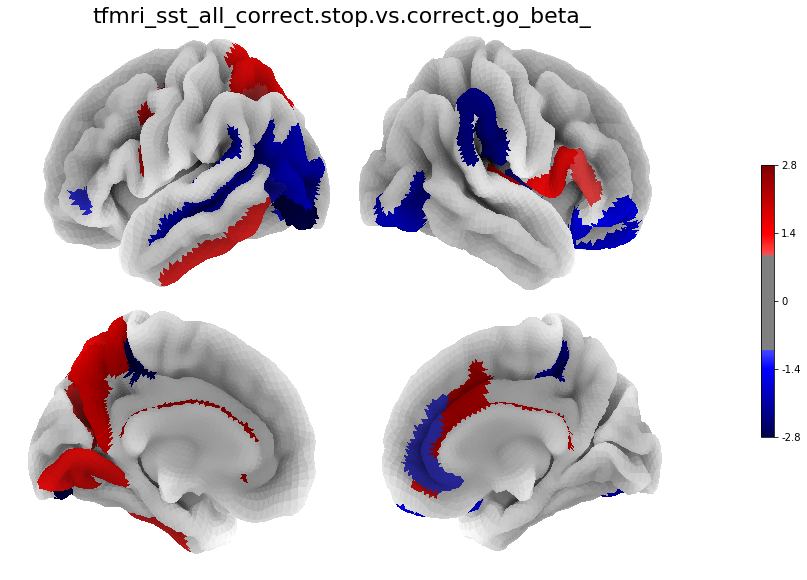

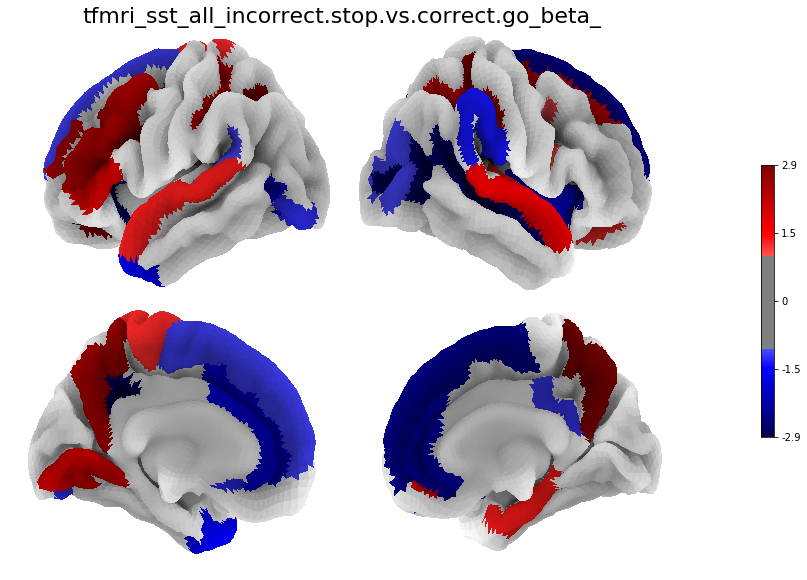

In [22]:
for i in range(len(betas)):
    figure, axes, smf = Plot_Surf_Collage(data = betas[i],
                                          ref = surf_ref,
                                          surf_mesh = 'pial',
                                          bg_map = 'sulc',
                                          view = 'standard',
                                          cmap = 'seismic',
                                          title = contrast_keys[i],
                                          title_sz = 22,
                                          threshold = 1,
                                          wspace = 0,
                                          hspace = 0,
                                          figsize = (15, 10),
                                          avg_method = 'median',
                                          bg_on_data = True,
                                          alpha = 1,
                                          colorbar = True)

    #plt.savefig(contrast_keys[i] + '.png', dpi=100, bbox_inches='tight')

### Below is just playing around with making a gif of subcortical activation (it could certainly be developed a bit more)

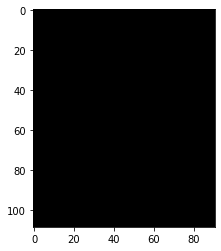

In [21]:
from nilearn.datasets import load_mni152_template
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

vol_ref = VolRef(data_dr, space='mni', parc='aseg_2mm')
bkg_img = load_mni152_template().get_fdata().T
vol_vals = vol_ref.get_plot_vals(feats_df, i_keys=['_subcort.aseg']).get_fdata().T

cmap = cm.get_cmap('Reds')
colored = cmap(vol_vals)[:,:,:,:3] * 255
colored = colored.astype(int)

# Normalize to 255
mx = np.max(bkg_img)
mn = np.min(bkg_img)

bkg_img -= mn
bkg_img *= (255 / (mx - mn))
bkg_img = bkg_img.astype(int)

threshold = .5

fig, ax = plt.subplots()
def update(s):
    
    slc = bkg_img[s]
    stacked = np.stack([slc, slc, slc], axis=-1)
    vals_slc = vol_vals[s]

    inds = np.where(vals_slc > threshold)
    if len(inds[0]) > 0:
        
        stacked[inds] = colored[s][inds]

    plt.imshow(stacked)

ani = FuncAnimation(fig, update, frames=[s for s in range(len(bkg_img))])
ani.save('subcortical.gif', writer='imagemagick')